# BEGINNER EXPLORATORY DATA ANALYSIS WITH PYTHON

**Index**
1. Initiation
2. Data cleaning and preprocessing
3. Study of variables (features) in isolation
4. Study of variables in groups and combinations
5. To be continued...

# 1. Initiation

In [74]:
#importing the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [75]:
#Load the train data in dataframe
df_train = pd.read_csv('../input/train.csv')

In [76]:
#Display the columns in training set
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 2. Data cleaning and preprocessing
First step in any project - to clean and preprocess the data for further analysis and model building. Here the focus is on missing values (NA) and the corresponding patterns. 

In [77]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [78]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [80]:
#Analysing Missing Values (NA)
total_na = df_train.isnull().sum().sort_values(ascending=False)
percent_na = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
na_df = pd.concat([total_na, percent_na], axis=1, keys=['No of Missing Values', '% of Missing Values']).sort_values(by= '% of Missing Values', ascending = False)
na_df.head(20)

,No of Missing Values,% of Missing Values
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


Below set of variables 'PoolQC', 'MiscFeature' and 'FireplaceQu' looks like probable outliers. Similarly, 'Electrical'and 'PavedDrive' also looks like probable outliers with fewest occurences. Let us drop them from our dataframe.

Remaining missing values will be handled by replacing them with mean values.

In [81]:
na_df[na_df['% of Missing Values'] > 0.4]

,No of Missing Values,% of Missing Values
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [82]:
na_df.loc[['MasVnrType', 'MasVnrArea','Electrical']]

,No of Missing Values,% of Missing Values
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [83]:
#dealing with missing data
df_train = df_train.drop((na_df[na_df['% of Missing Values'] > 0.4]).index,1)
df_train = df_train.drop((na_df.loc[['MasVnrType', 'MasVnrArea','Electrical']]).index,1)

In [84]:
na_df.isnull().sum().max() #Checking for any missed out NAs
# na_df.head(20)

0

In [85]:
#Filling NA for other Missing Values with Mean values
df_train['LotFrontage'].fillna(value = df_train['LotFrontage'].mean, inplace = True)
df_train['GarageCond'].fillna(value = df_train['GarageCond'].mean, inplace = True)
df_train['GarageType'].fillna(value = df_train['GarageType'].mean, inplace = True)
df_train['GarageFinish'].fillna(value = df_train['GarageFinish'].mean, inplace = True)
df_train['GarageQual'].fillna(value = df_train['GarageQual'].mean, inplace = True)
df_train['GarageYrBlt'].fillna(value = df_train['GarageYrBlt'].mean, inplace = True)
df_train['BsmtExposure'].fillna(value = df_train['BsmtExposure'].mean, inplace = True)
df_train['BsmtFinType2'].fillna(value = df_train['BsmtFinType2'].mean, inplace = True)
df_train['BsmtFinType1'].fillna(value = df_train['BsmtFinType1'].mean, inplace = True)
df_train['BsmtCond'].fillna(value = df_train['BsmtCond'].mean, inplace = True)
df_train['BsmtQual'].fillna(value = df_train['BsmtQual'].mean, inplace = True)

## Detecting Outliers
Outliers can be detected with the help of Univariate and Bivariate analysis

### Univariate analysis

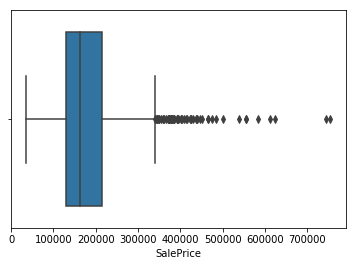

In [86]:
sns.boxplot(x = df_train['SalePrice'])

In [87]:
#standardizing data
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


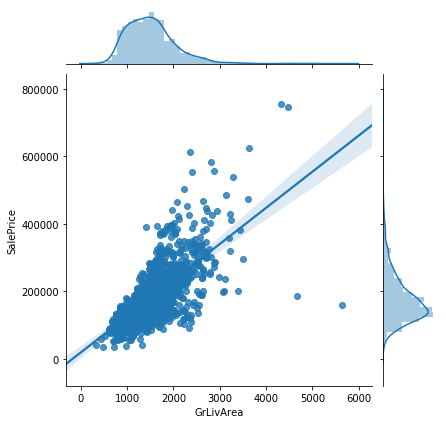

In [88]:
#bivariate analysis saleprice/grlivarea
sns.jointplot(x = 'GrLivArea', y = 'SalePrice', data = df_train, kind = 'reg');

### Bivariate analysis

Deleting the outliers identified from boxplot, StandardScaler and Jointplot...

In [89]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

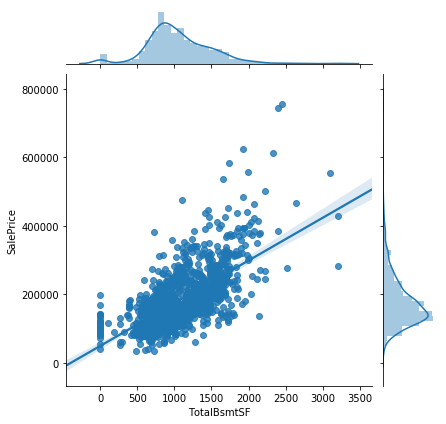

In [90]:
#bivariate analysis saleprice/grlivarea
sns.jointplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df_train, kind = 'reg');

Not much outliers in this plot. Moving on to study of SalePrice variable...

# 3. Study of variables (features) in isolation: 'SalePrice' variable

In [91]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

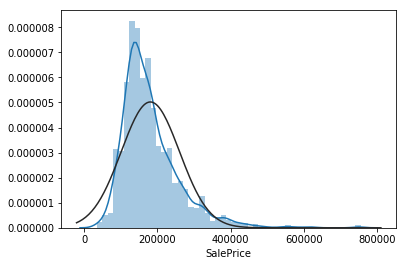

In [92]:
#histogram
sns.distplot(df_train['SalePrice'], fit = norm);


In [93]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067


We can observe that the distribution is showing peakedness with a kurtosis of 6.5362 and positively skewed with Skewness at 1.8828.

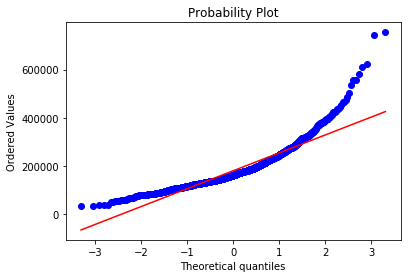

In [94]:
#Normal probability plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

'SalePrice' has positive skew and is not following the shape of normal distribution. In the last part, let us convert it into logarathamic scale and recheck.

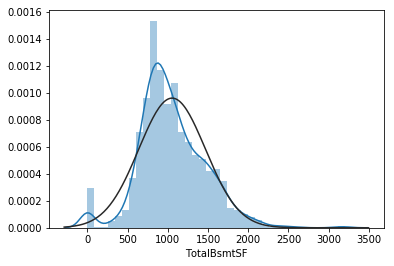

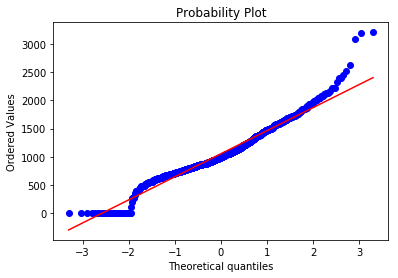

In [95]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [96]:
#Creating a new column for category variable
#if area>0 then 1, else if area==0 then 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

### Relationship with numerical variables

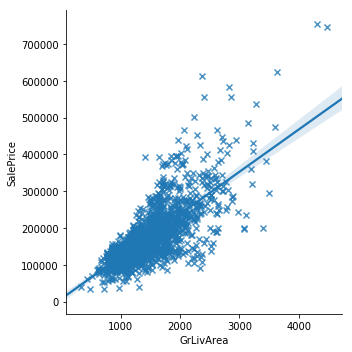

In [98]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
sns.lmplot(x=var, y='SalePrice', markers = 'x', data = df_train)

SalePrice and GrLivArea are positive + linearly correlated. 

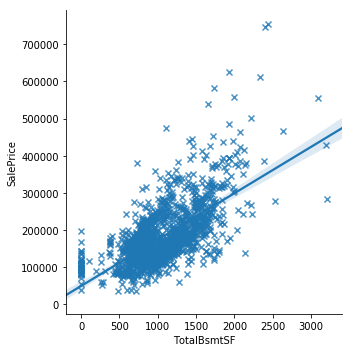

In [99]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
sns.lmplot(x=var, y='SalePrice', markers = 'x', fit_reg = True, data = df_train)

SalePrice and TotalBsmtSF are even more positively correlated with much stronger linear correlation. 

### Relationship with categorical features

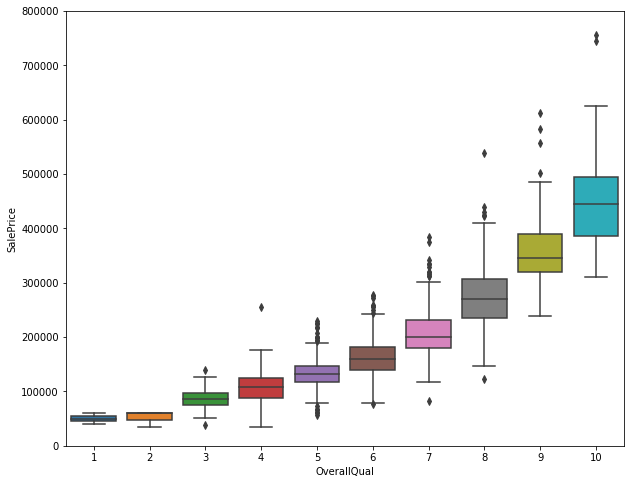

In [100]:

#box plot overallqual/saleprice
var = 'OverallQual'
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);

We can see that as OverallQual improves, SalePrice also improves with significant linear increase in terms of IQR.

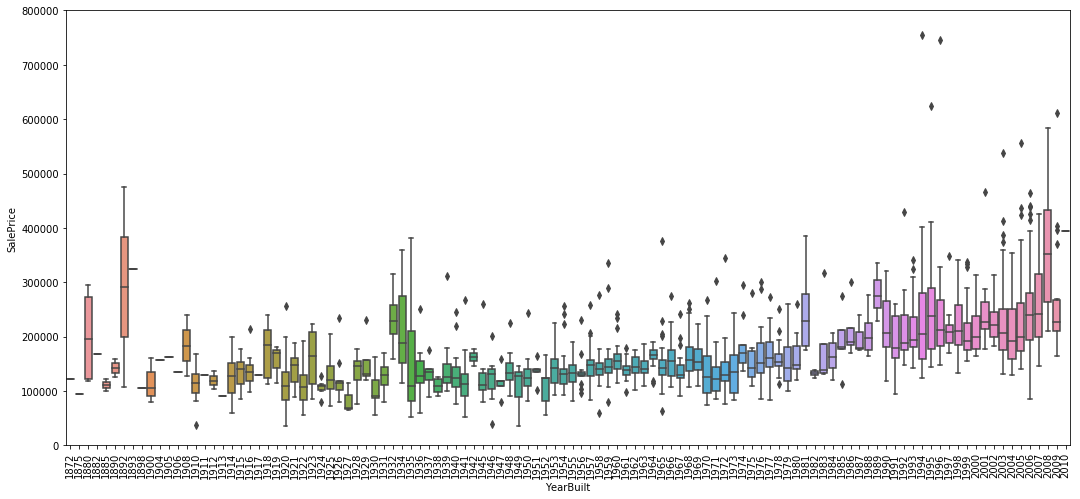

In [101]:
var = 'YearBuilt'
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

Not a clear relationship established here. However, we can still say that the recently built houses has an higher sale price. 
Also, year 2009 is an anomaly here due to the sub-prime crisis - all the asset classes went south. 

# 4. Study of variables in groups and combinations

Now let us delve deep into the study of relationships among variables in combinations. We will be using the regression scatter plots, correlation matrix, heatmap etc for this section.

#### Correlation matrix (heatmap style)

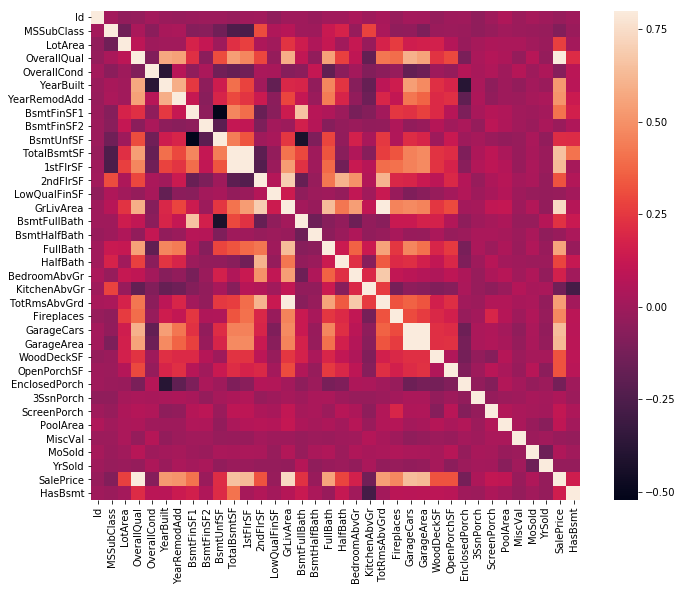

In [102]:
#Heatmap from Correlation Matrix for all the variables in dataset
corr_mat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);

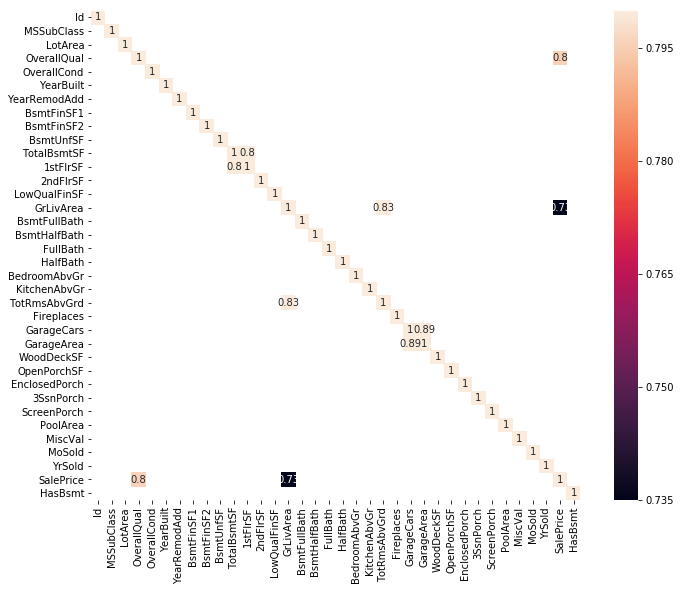

In [103]:
#STRONG POSITIVELY CORRELATED
corr_mat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat[corr_mat > 0.7], vmax=.8, annot = True, square=True);

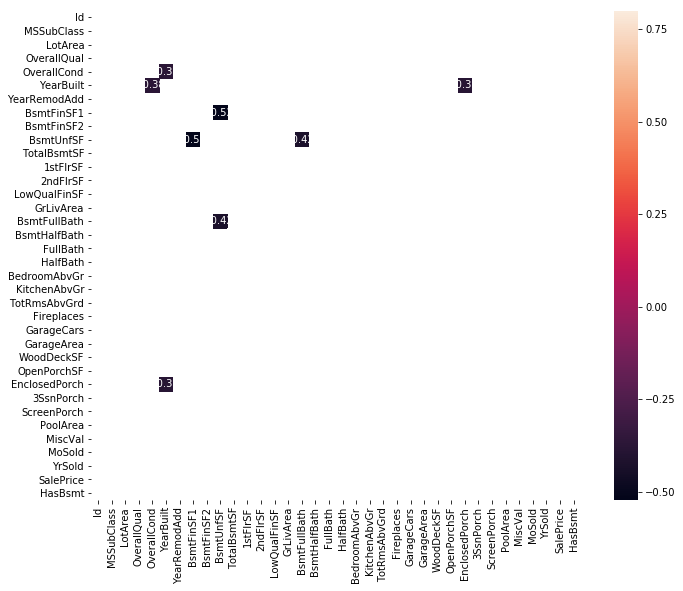

In [104]:
#STRONG NEGATIVELY CORRELATED
corr_mat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat[corr_mat < -0.3], vmax=.8, annot = True, square=True);
# sns.heatmap(corr_mat, mask = corr_mat < -0.4, vmax=.8, annot = True, square=True);

Following fields are observed to be vs having a strong correlation:
1. 'TotalBsmtSF'vs '1stFlrSF'. 
2. 'YearBlt'vs 'GarageYrBlt'. 
(This is obvious isn't it! Not an useful observation but it shows that these variables are multi-collinear in nature. 

#### 'SalePrice' correlation matrix (zoomed heatmap style)

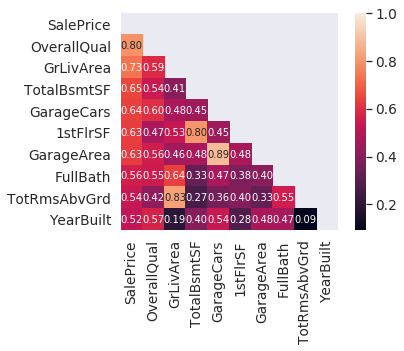

In [105]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True
hm = sns.heatmap(cm, cbar=True, mask = mask, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Scatter plots : 'SalePrice' vs Correlated Variables

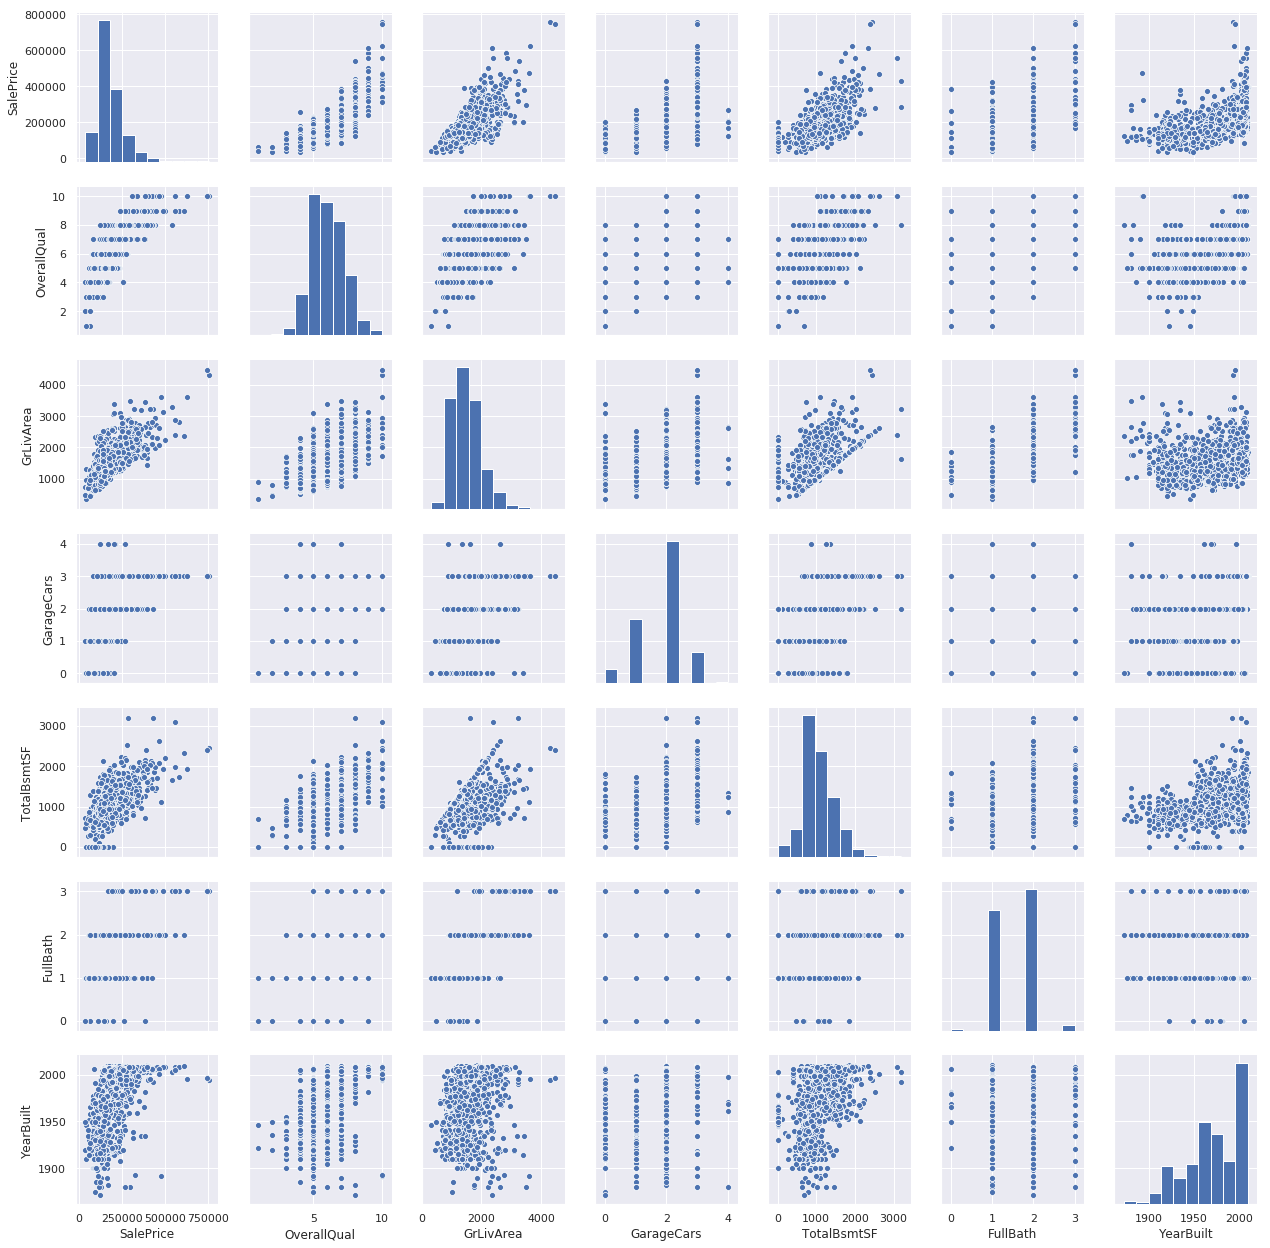

In [106]:
#scatterplot
sns.set(palette = 'deep')
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

## Now let us try to apply StandardScaler and log transformations and recheck some of the variable plots

In [107]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);

In [110]:
#applying log transformation
df_train['SalePrice_Log'] = np.log(df_train['SalePrice'])

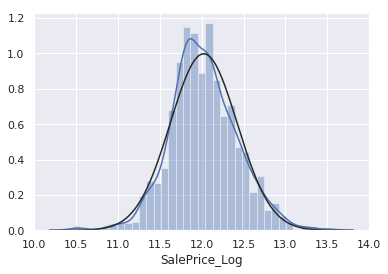

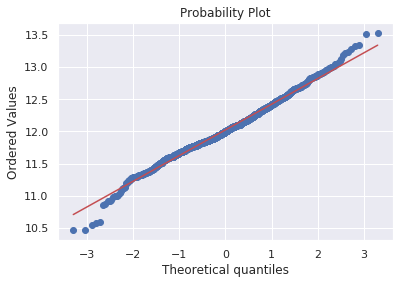

In [114]:
sns.distplot(df_train['SalePrice_Log'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice_Log'], plot=plt)

In [ ]:
#standardizing data
totalBsmtSF_scaled = StandardScaler().fit_transform(df_train['TotalBsmtSF'][:,np.newaxis]);

In [112]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

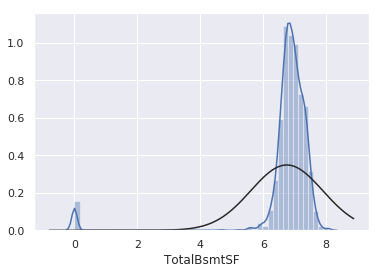

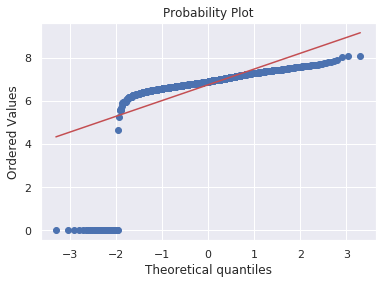

In [115]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

TO BE CONTINUED....